#Mixture: 30% C0$_2$ 1% SF$_6$

##Python modules and instalation

In [ ]:
!pip install hep_ml
!pip install mplhep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for theano: filename=Theano-1.0.5-py3-none-any.whl size=2668110 sha256=09ce33943130ebd7fed2a23dd3290f92b9b240324ac17e73c58c0cce16af72de
  Stored in directory: /root/.cache/pip/wheels/d9/e6/7d/2267d21a99e4ab8276f976f293b4ff23f50c9d809f4a216ebb
Successfully built theano
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 19.4 MB/s eta 0:00:00


In [ ]:
import mplhep
import hep_ml

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls drive/MyDrive/colab2021/scripts

 bins/                         ks_test.py
 completeV3.py                 mass_models.py
'Copia de customPDFs.py'      ' plot_tools ant.py'
'Copia de ks_test.py'          plot_tools.py
'Copia de plot_tools (1).py'   plot_tools_xgb.py
'Copia de plot_tools.py'       __pycache__/
'Copia de SLSQP_zfit.py'       Sergrew_old.py
'Copia de tools.py'            Sergrew.py
 customPDFs.py                 SLSQP_zfit.py
 cuts/                         tools.py
 cuts.py                       weightedcorrelation_matrix.py
 join_split.py                 zfitEffy.py


In [ ]:
import os
import sys
sys.path.append("drive/MyDrive/colab2021/scripts")

In [ ]:
ls drive/MyDrive/colab2021/scripts

 bins/                         ks_test.py
 completeV3.py                 mass_models.py
'Copia de customPDFs.py'      ' plot_tools ant.py'
'Copia de ks_test.py'          plot_tools.py
'Copia de plot_tools (1).py'   plot_tools_xgb.py
'Copia de plot_tools.py'       __pycache__/
'Copia de SLSQP_zfit.py'       Sergrew_old.py
'Copia de tools.py'            Sergrew.py
 customPDFs.py                 SLSQP_zfit.py
 cuts/                         tools.py
 cuts.py                       weightedcorrelation_matrix.py
 join_split.py                 zfitEffy.py


In [ ]:
import plot_tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit
import json
import math

##Global Warming Potential

GWP for different gas mixtures

In [ ]:
def calc_mass(gas, flux, paramC02 = False):

  """
  gas: np.array
    A list with entries [mass, GWP, fraction]
  """

  if paramC02 == False:
    gmass = flux*gas[2]*8760*gas[0]*gas[1]/22.4
  else:
    gmass = flux*8760*44/22.4

  return gmass

In [ ]:
def totalGWP(gases, flux):
  """
  Function that calculates the Global Warming Potential for a gas mixture.

  -----------------------
  Parameters:

  gases: np.array
    An array of arrays containing all list of gases to be used. On the first entry of each subarray
    it should contain the mass of the gass, while on the second one the GWP of the gas must be specified.

  -----------------------
  Returns:

    Nothing for now haha
  """

  GWP = 0
  MCO2 = calc_mass(gases[0], flux, True)

  for i in range(len(gases)):

    GWP = GWP + calc_mass(gases[i], flux)

  GWP = GWP/MCO2

  return GWP

We are gonna calculate all of them in order. The list is:

94.7% R-134a + 5.0% iC4H10 + 0.3% SF6

64.7% R-134a + 30% CO2 + 5.0% iC4H10 + 0.3% SF6

54.7% R-134a + 40% CO2 + 5.0% iC4H10 + 0.3% SF6

64.5% R-134a + 30% CO2 + 5.0% iC4H10 + 0.5% SF6

And also with the consideration of 80% of gas recovery and a flux of 1000 ln/h.


In [ ]:
mix1 = np.array([[102, 1430, 0.947], [58.12, 3, 0.05], [146.06, 22800, 0.03]])
mix2 = np.array([[102, 1430, 0.647], [44, 1, 0.3], [58.12, 3, 0.05], [146.06, 22800, 0.03]])
mix3 = np.array([[102, 1430, 0.547], [44, 1, 0.4], [58.12, 3, 0.05], [146.06, 22800, 0.03]])
mix4 = np.array([[102, 1430, 0.645], [44, 1, 0.3], [58.12, 3, 0.05], [146.06, 22800, 0.05]])

print('The total GWP of mixture 1 is: ', totalGWP(mix1, 1000))
print('The total GWP of mixture 2 is: ', totalGWP(mix2, 1000))
print('The total GWP of mixture 3 is: ', totalGWP(mix3, 1000))
print('The total GWP of mixture 4 is: ', totalGWP(mix4, 1000))

The total GWP of mixture 1 is:  5410.072227272727
The total GWP of mixture 2 is:  4415.872227272727
The total GWP of mixture 3 is:  4084.4722272727277
The total GWP of mixture 4 is:  5922.954954545455


Now, for the 80% recuperation for Freon, the GWP of the volume released to the atmosphere is:

In [ ]:
mix1 = np.array([[102, 1430, 0.947*0.2], [58.12, 3, 0.05], [146.06, 22800, 0.03]])
mix2 = np.array([[102, 1430, 0.647*0.2], [44, 1, 0.3], [58.12, 3, 0.05], [146.06, 22800, 0.03]])
mix3 = np.array([[102, 1430, 0.547*0.2], [44, 1, 0.4], [58.12, 3, 0.05], [146.06, 22800, 0.03]])
mix4 = np.array([[102, 1430, 0.645*0.2], [44, 1, 0.3], [58.12, 3, 0.05], [146.06, 22800, 0.05]])

print('The total GWP of mixture 1 is: ', totalGWP(mix1, 1000))
print('The total GWP of mixture 2 is: ', totalGWP(mix2, 1000))
print('The total GWP of mixture 3 is: ', totalGWP(mix3, 1000))
print('The total GWP of mixture 4 is: ', totalGWP(mix4, 1000))

The total GWP of mixture 1 is:  2898.628227272727
The total GWP of mixture 2 is:  2700.0282272727272
The total GWP of mixture 3 is:  2633.828227272727
The total GWP of mixture 4 is:  4212.414954545455


##Analysis plots

We are now going to reproduce the plots for each April scan with different ABS
filters: OFF, 3.3, 4.6, 10 and 22 with 30% CO2.

The list of files is:

5689 for source OFF Not working

5667 for ABS 3.3

5668 for ABS 4.6

5675 for ABS 10

5659 for ABS 22


In [ ]:
HV_points = 12

In [ ]:
def read_file(flabel):

  f = open(str(flabel)+'.json')
  data = json.load(f)

  voltages = []
  for i in range(HV_points):
    name = 'HV' + str(i+1)
    voltages.append(data[name]['hveff_KODELE-TOP'])

  efficiency = []
  for j in range(HV_points):
    name = 'HV' + str(j+1)
    efficiency.append(data[name]['efficiencyMuon_corrected'])

  efficiency_err = []
  for i in range(HV_points):
    name = 'HV' + str(i+1)
    efficiency_err.append(data[name]['efficiencyMuon_corrected_err'])

  return voltages, efficiency, efficiency_err

In [ ]:
labels = [5667, 5668, 5675, 5659]

v = []
e = []
err = []

for i in range(len(labels)):
  vi, ei, eei = read_file(labels[i])
  v.append(vi)
  e.append(ei)
  err.append(eei)

In [ ]:
def final_plots(voltages, efficiency, efficiency_err, Scurve):
  x = np.linspace(5900, 7400, 1000)
  fun = Scurve(x, params[0], params[1], params[2])
  plt.plot(x, fun, color = 'green')
  plt.title('GIF++', loc = 'left', fontsize = 22)
  plt.title('Muon efficiency for S5713', loc = 'right', fontsize = 22)
  plt.xlabel('$HV_{eff}$ (V)', fontsize = 20)
  plt.errorbar(x = voltages, y = efficiency, yerr=efficiency_err, xerr=None, fmt = 'bo')
  plt.ylabel('Efficiency (%)', fontsize = 20)
  #plt.text(0.95, 0.07, WP, fontsize = 15)
  plt.show()

In [ ]:
def Scurve(x, Emax, HV50, lam):
    return Emax/(1 + np.exp(-(lam)*(x - HV50)))

In [ ]:
def Scurve_fitting(voltages, efficiency, efficiency_err, flabel):

  def Scurve(x, Emax, HV50, lam):
    return Emax/(1 + np.exp(-(lam)*(x - HV50)))

  def pre_plots(voltages, efficiency, efficiency_err, params, Scurve, flabel):
    x = np.linspace(6000, 7800, 1000)
    fun = Scurve(x, params[0], params[1], params[2])
    plt.plot(x, fun, color = 'green')
    plt.title('GIF++', loc = 'left', fontsize = 22, fontweight='bold')
    plt.title('Muon efficiency for S'+str(flabel), loc = 'right', fontsize = 22, fontweight='bold')
    plt.xlabel('$HV_{eff}$ (V)', fontsize = 20)
    plt.errorbar(x = voltages, y = efficiency, yerr=efficiency_err, xerr=None, fmt = 'bo')

    plt.ylabel('Efficiency (%)', fontsize = 20)
    plt.savefig('Muon_eff_S'+str(flabel)+'.pdf')
    plt.show()

  p0 = np.array([95.2, 6497.2, 0.010])

  params, cov = curve_fit(Scurve, voltages, efficiency, p0)

  Emax = params[0]
  HV50 = params[1]
  lamb = params[2]

  WP = np.log(19)/lamb + HV50 + 150
  Eff_WP = Scurve(WP, Emax, HV50, lamb)

  print('The working point (WP) is: ', WP, " and the efficiency at the WP is: ", Eff_WP)

  pre_plots(voltages, efficiency, efficiency_err, params, Scurve, flabel)

  results = [params, WP, Eff_WP]

  return results

The working point (WP) is:  7140.201586259909  and the efficiency at the WP is:  94.58098889564718


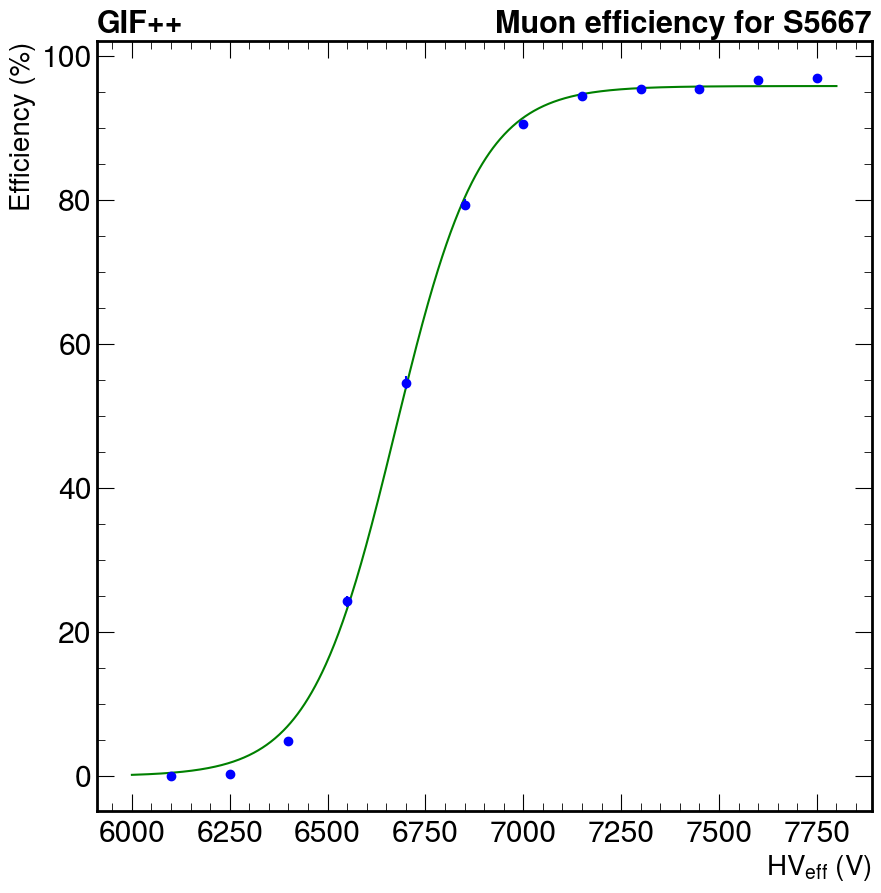

The working point (WP) is:  7136.197003459727  and the efficiency at the WP is:  95.16630572696495


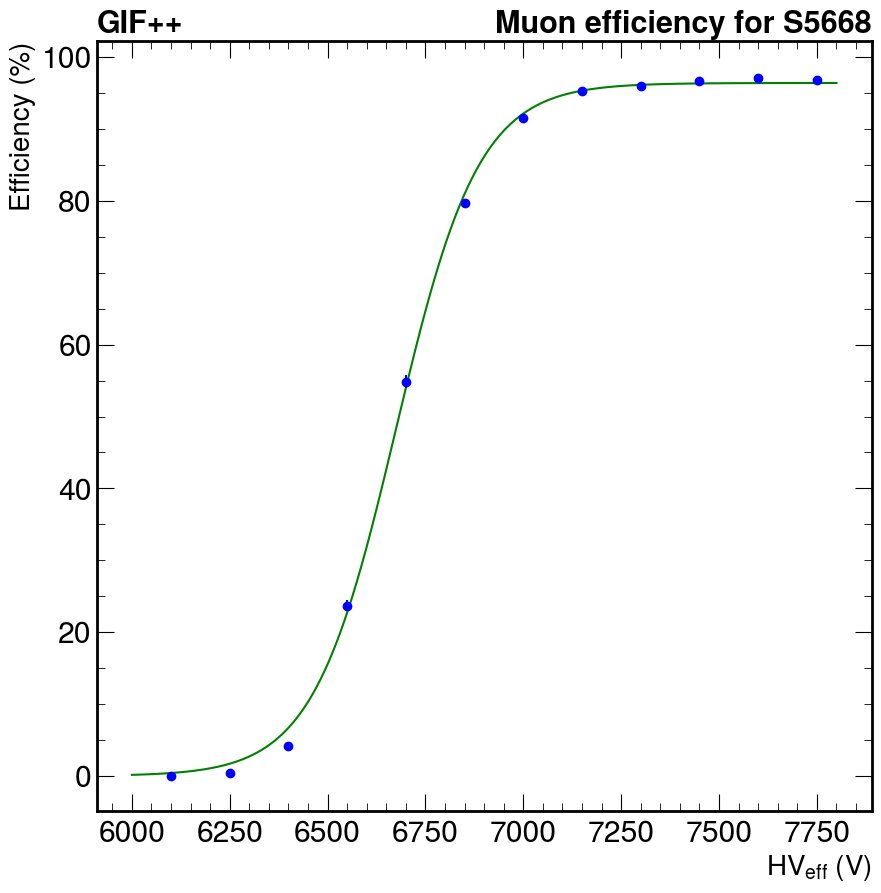

The working point (WP) is:  7136.212484934575  and the efficiency at the WP is:  96.04716705199941


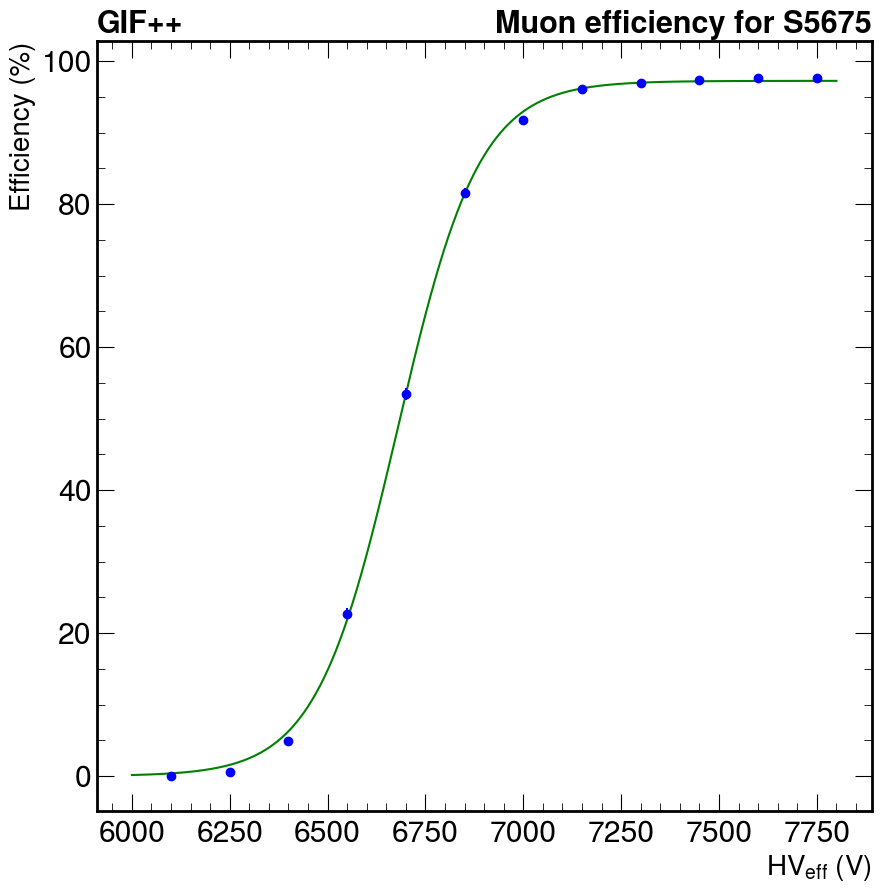

The working point (WP) is:  7134.361046422647  and the efficiency at the WP is:  96.75774021587132


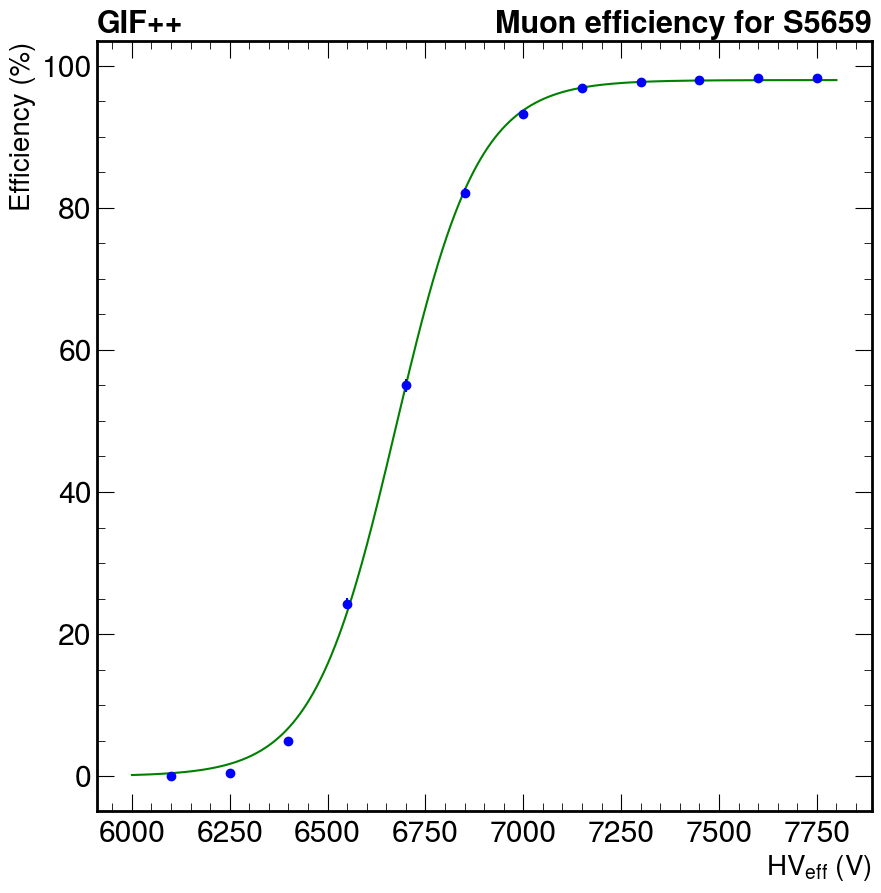

In [ ]:
p = []
WPs = []
EWPs = []

for i in range(len(labels)):

  flabel = labels[i]

  pi, WPi, EWPi =  Scurve_fitting(v[i], e[i], err[i], flabel)
  p.append(pi)
  WPs.append(WPi)
  EWPs.append(EWPi)

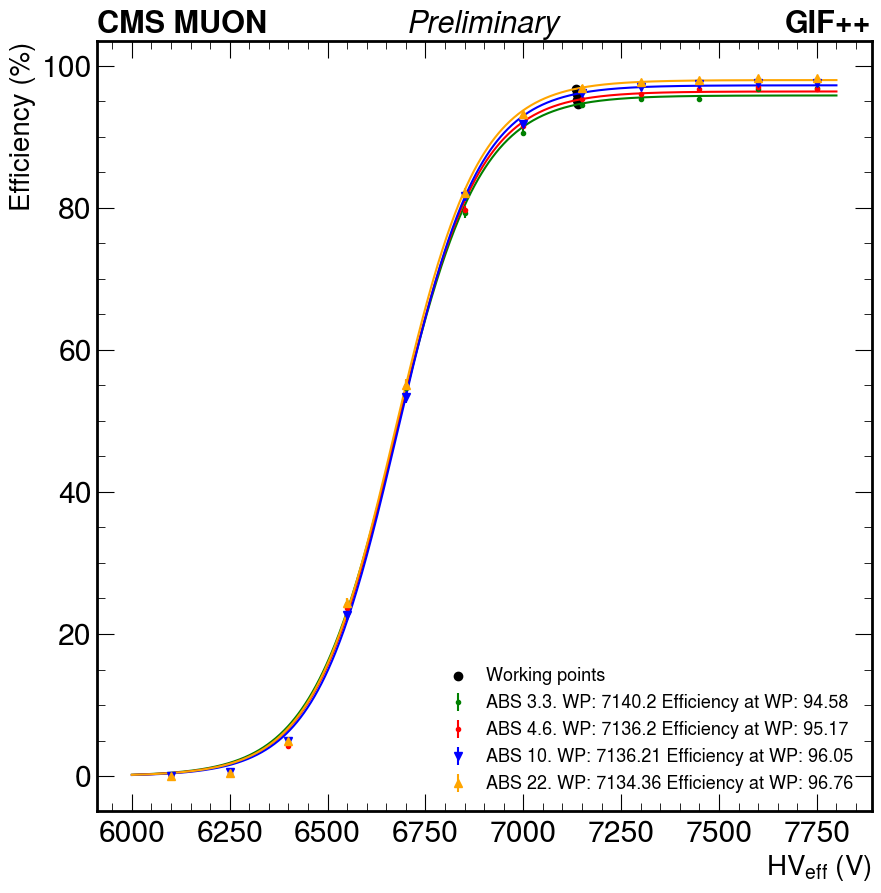

In [ ]:
def plot_all(voltages, efficiencies, e_err, param, WPs, EWps):

  x = np.linspace(6000, 7800, 1000)

  for k in range(len(voltages)):

    if k == 0:
      fcolor = 'green'
      filter = 'ABS 3.3.'
      fmt = '.'
    elif k == 1:
      fcolor = 'red'
      filter = 'ABS 4.6.'
      fmt = '.'
    elif k == 2:
      fcolor = 'blue'
      filter = 'ABS 10.'
      fmt = 'v'
    elif k == 3:
      fcolor = 'orange'
      filter = 'ABS 22.'
      fmt = '^'
    else:
      fcolor = 'purple'
      filter = 'ABS 22'
      fmt = 'o'

    s = Scurve(x, param[k][0], param[k][1], param[k][2])
    plt.plot(x, s, color = fcolor)
    plt.errorbar(x = voltages[k], y = efficiencies[k], yerr=e_err[k], xerr=None, fmt = fmt, color = fcolor, label=str(filter)+' WP: '
              +str(round(WPs[k], 2))+' Efficiency at WP: '+str(round(EWPs[k], 2)))
    plt.legend(loc='lower right', fontsize=13)

  plt.title('CMS MUON', loc = 'left', fontsize = 22, fontweight='bold')
  plt.title('Preliminary', loc='center', fontsize=22, fontstyle = 'italic')
  plt.title('GIF++', loc = 'right', fontsize = 22, fontweight='bold')
  plt.xlabel('$HV_{eff}$ (V)', fontsize = 20)
  plt.legend(loc = 'upper left')
  plt.scatter(WPs, EWPs, color = 'black', label='Working points')
  plt.legend(loc='lower right', fontsize =13)
  plt.ylabel('Efficiency (%)', fontsize = 20)
  plt.savefig('July_Mix1.pdf')
  plt.savefig('July_Mix1.png')
  plt.show()

plot_all(v, e, err, p, WPs, EWPs)

Gamma background rate

This next part is calculated as:

GBR = noise gamma rate/ Gamma Cluster

In [ ]:
def find_GB(flabel, WP):

  f = open(str(flabel)+'.json')
  data = json.load(f)

  vef = []
  for i in range(HV_points):
    name = 'HV' + str(i+1)
    vef.append(data[name]['hveff_KODELE-TOP'])

  for i in range(len(vef)):
    vef[i] = abs(vef[i] - WP)

  HV_number = vef.index(min(vef)) + 1

  print("The nearest HV point to the WP is: ", HV_number)

  name = 'HV' + str(HV_number)
  gamma_r = data[name]['noiseGammaRate']
  CLS = data[name]['gammaCLS']

  bkg = gamma_r/CLS
  print('Gamma background rate is: ', bkg)

  return bkg

In [ ]:
for l in range(len(WPs)):
  print("Scan: ", labels[l])
  find_GB(labels[l], WPs[l])

Scan:  5667
The nearest HV point to the WP is:  8
Gamma background rate is:  1268.6221695203972
Scan:  5668
The nearest HV point to the WP is:  8
Gamma background rate is:  853.8851370415429
Scan:  5675
The nearest HV point to the WP is:  8
Gamma background rate is:  428.2918494117841
Scan:  5659
The nearest HV point to the WP is:  8
Gamma background rate is:  221.18337273035738


# Mixture: 30% C0$_2$, 0.5% SF$_6$ with tracking

##Analysis plots

The list of files is:

568 for Source OFF

554 for ABS 1

574 for ABS 3.3

555 for ABS 4.6 Only for KODEL H

576 for ABS 6.9

596 for ABS 22

566 for ABS 2.2

548 for ABS 100

In [ ]:
HV_points = 12

In [ ]:
def read_file(flabel):

  HV_points = 12

  f = open(str(flabel)+'.json')
  data = json.load(f)

  voltages = [5800, 6000, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100]

  efficiency = []
  for j in range(HV_points):
    name = 'HV' + str(j+1)
    efficiency.append(data[name]['efficiencyMuon_corrected'])

  efficiency_err = []
  for i in range(HV_points):
    name = 'HV' + str(i+1)
    efficiency_err.append(data[name]['efficiencyMuon_corrected_err'])

  return voltages, efficiency, efficiency_err

In [ ]:
labels = [568, 574, 576, 596]#, 566, 548, 554]

v = []
e = []
e_err = []

for i in range(len(labels)):
  vi, ei, eei = read_file(labels[i])
  v.append(vi)
  e.append(ei)
  err.append(eei)

The working point (WP) is:  6697.262341058812  and the efficiency at the WP is:  96.27602249963769


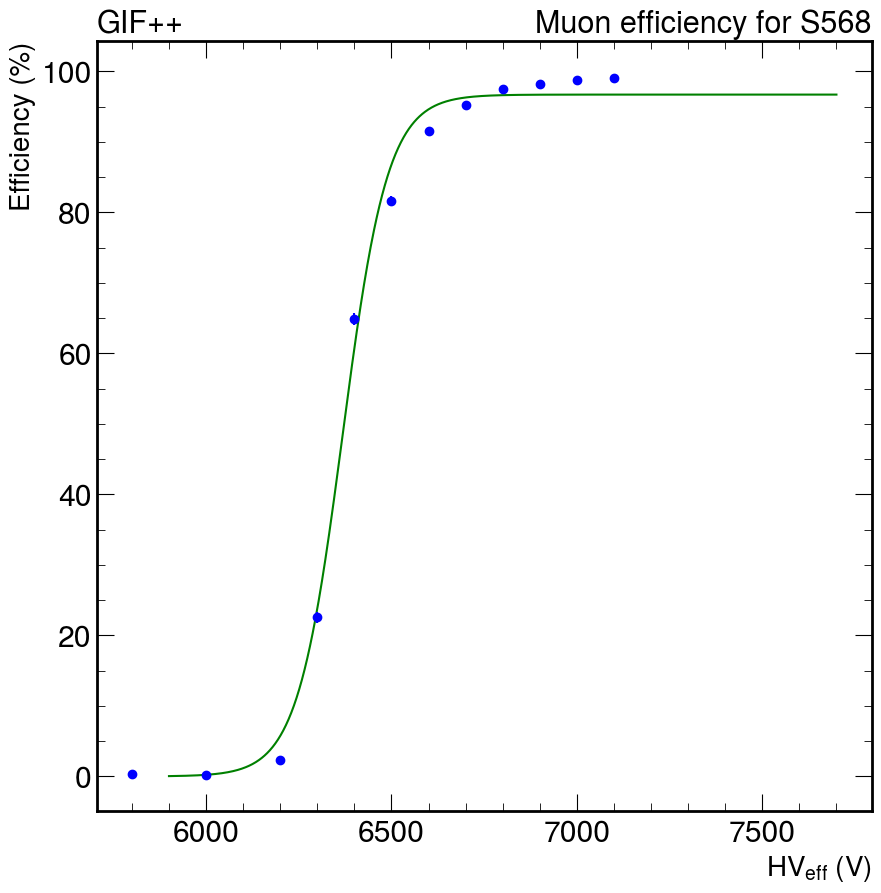

The working point (WP) is:  6691.83236495694  and the efficiency at the WP is:  92.87662795143785


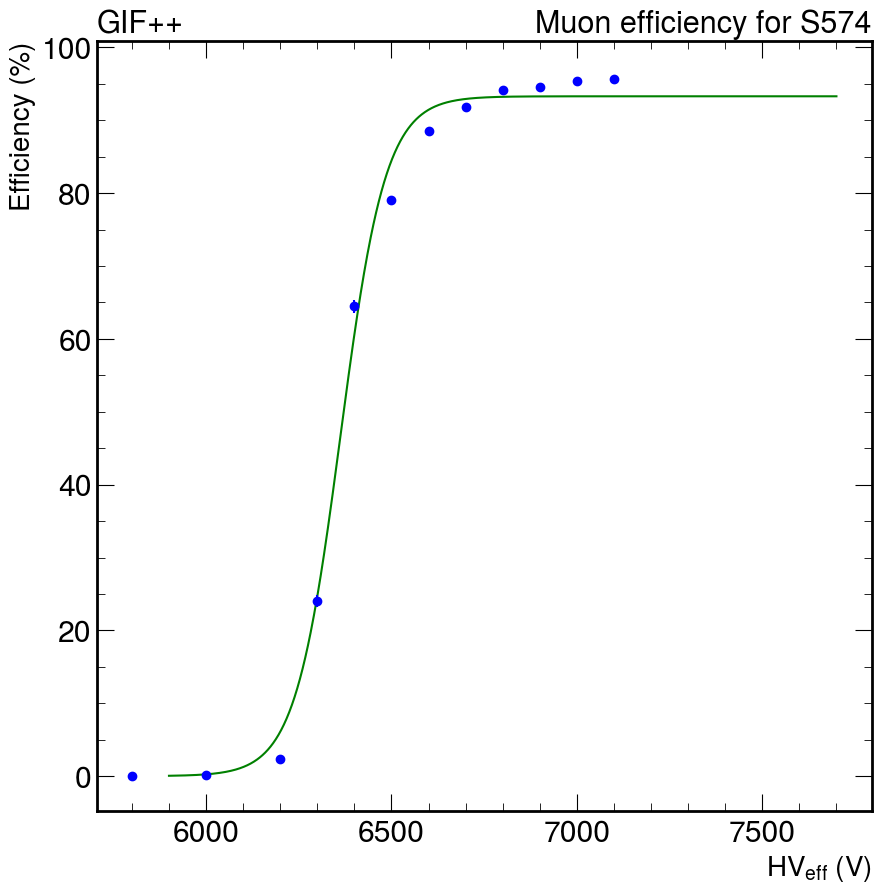

The working point (WP) is:  6694.899779764775  and the efficiency at the WP is:  94.27095219821392


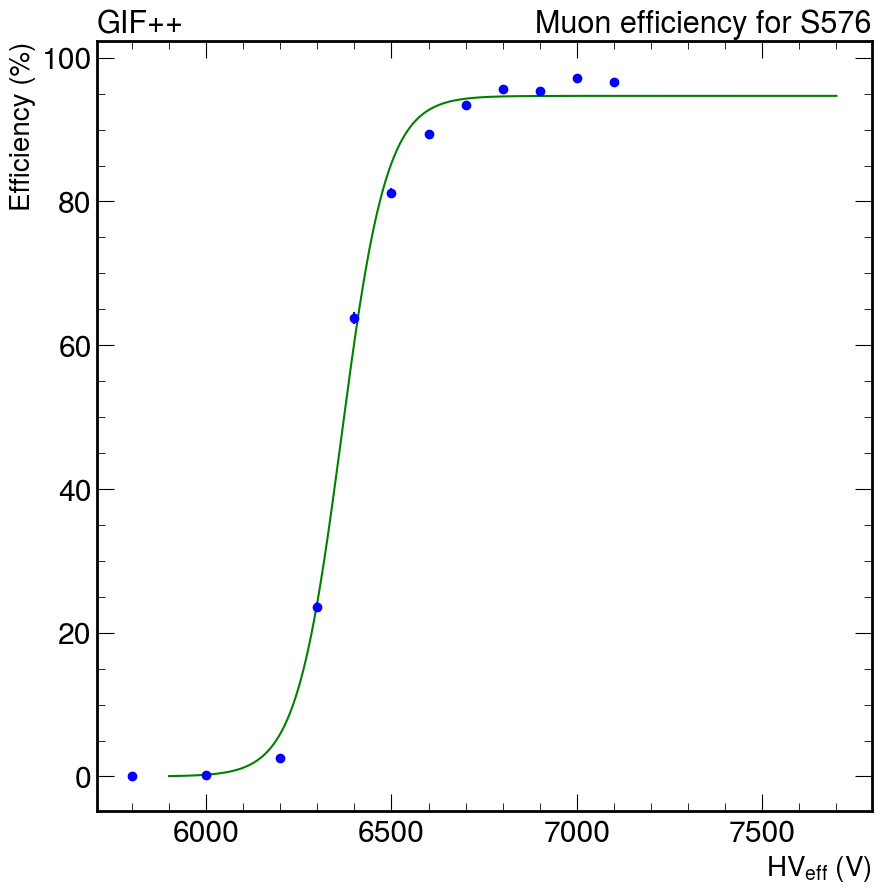

The working point (WP) is:  6727.301791887638  and the efficiency at the WP is:  95.24195360928672


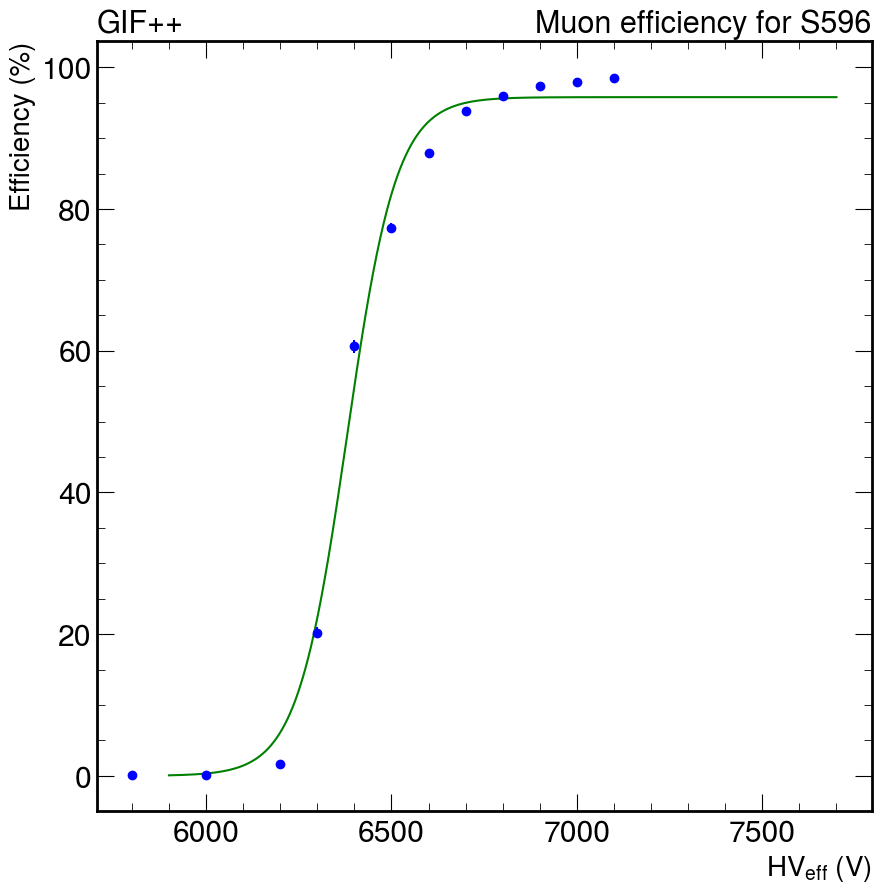

In [ ]:
p = []
WPs = []
EWPs = []

for i in range(len(labels)):

  flabel = labels[i]

  pi, WPi, EWPi =  Scurve_fitting(v[i], e[i], err[i], flabel)
  p.append(pi)
  WPs.append(WPi)
  EWPs.append(EWPi)

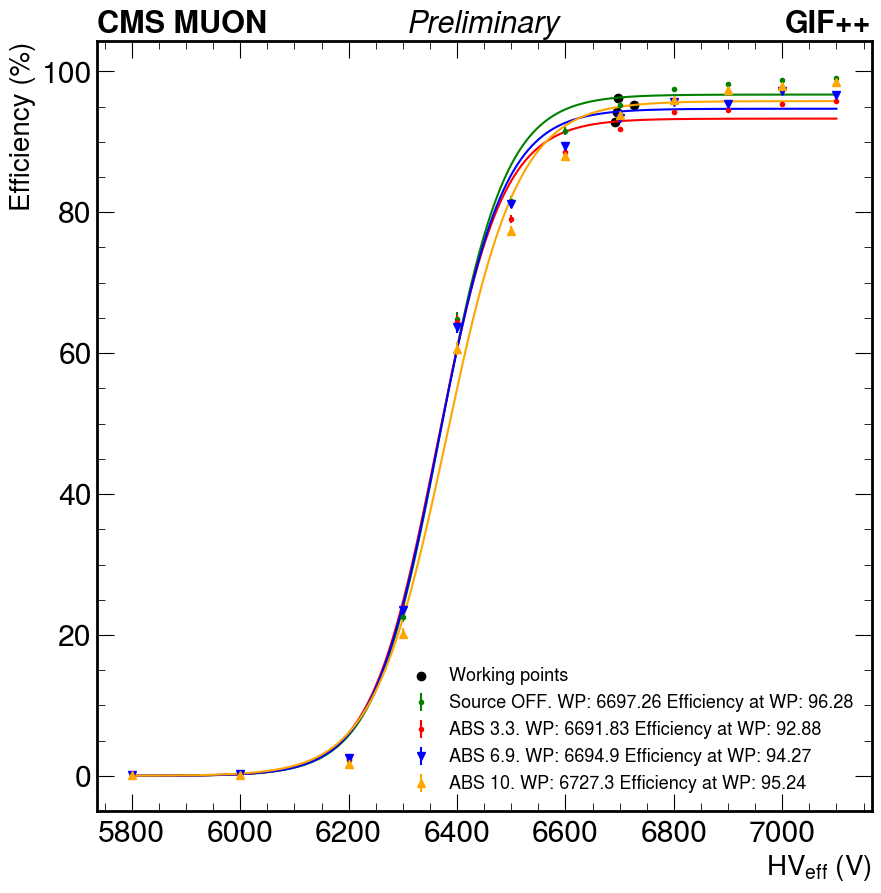

In [ ]:
def plot_all(voltages, efficiencies, e_err, param, WPs, EWps):

  x = np.linspace(5800, 7100, 1000)

  for k in range(len(voltages)):

    if k == 0:
      fcolor = 'green'
      filter = 'Source OFF.'
      fmt = '.'
    elif k == 1:
      fcolor = 'red'
      filter = 'ABS 3.3.'
      fmt = '.'
    elif k == 2:
      fcolor = 'blue'
      filter = 'ABS 6.9.'
      fmt = 'v'
    elif k == 3:
      fcolor = 'orange'
      filter = 'ABS 10.'
      fmt = '^'
    else:
      fcolor = 'purple'
      filter = 'ABS 10'
      fmt = 'o'

    s = Scurve(x, param[k][0], param[k][1], param[k][2])
    plt.plot(x, s, color = fcolor)
    plt.errorbar(x = voltages[k], y = efficiencies[k], yerr=e_err[k], xerr=None, fmt = fmt, color = fcolor, label=str(filter)+' WP: '
              +str(round(WPs[k], 2))+' Efficiency at WP: '+str(round(EWPs[k], 2)))
    plt.legend(loc='lower right', fontsize=13)

  plt.title('CMS MUON', loc = 'left', fontsize = 22, fontweight='bold')
  plt.title('Preliminary', loc='center', fontsize=22, fontstyle = 'italic')
  plt.title('GIF++', loc = 'right', fontsize = 22, fontweight='bold')
  plt.xlabel('$HV_{eff}$ (V)', fontsize = 20)
  plt.legend(loc = 'upper left')
  plt.scatter(WPs, EWPs, color = 'black', label='Working points')
  plt.legend(loc='lower right', fontsize =13)
  plt.ylabel('Efficiency (%)', fontsize = 20)
  plt.savefig('July_Mix3.pdf')
  plt.savefig('July_Mix3.png')
  plt.show()

plot_all(v, e, err, p, WPs, EWPs)

In [ ]:
def find_GB(flabel, WP):

  f = open(str(flabel)+'.json')
  data = json.load(f)

  vef = [5800, 6000, 6200, 6300, 6400, 6500, 6600, 6700, 6800, 6900, 7000, 7100]

  for i in range(len(vef)):
    vef[i] = abs(vef[i] - WP)

  HV_number = vef.index(min(vef)) + 1

  print("The nearest HV point to the WP is: ", HV_number)

  name = 'HV' + str(HV_number)
  gamma_r = data[name]['noiseGammaRate']
  CLS = data[name]['gammaCLS']

  bkg = gamma_r/CLS
  print('Gamma background rate is: ', bkg)

  return bkg

In [ ]:
for l in range(len(WPs)):
  find_GB(labels[l], WPs[l])

The nearest HV point to the WP is:  8
Gamma background rate is:  0.4411380396801903
The nearest HV point to the WP is:  8
Gamma background rate is:  1301.4789484684368
The nearest HV point to the WP is:  8
Gamma background rate is:  648.7657886607964
The nearest HV point to the WP is:  8
Gamma background rate is:  181.92525491248338


#Mixture: 30% CO$_2$, 0.5% SF$_6$

## Analysis plots

The list of files is:

5705 for source OFF

5713 for ABS 3.3

5709 for ABS 4.6

5708 for ABS 6.9

5707 for ABS 10

5706 for ABS 22 NOT THIS ONE

In [ ]:
HV_points = 10

In [ ]:
def read_file(flabel):

  f = open(str(flabel)+'.json')
  data = json.load(f)

  voltages = []
  for i in range(HV_points):
    name = 'HV' + str(i+1)
    voltages.append(data[name]['hveff_KODELE-TOP'])

  efficiency = []
  for j in range(HV_points):
    name = 'HV' + str(j+1)
    efficiency.append(data[name]['efficiencyMuon_corrected'])

  efficiency_err = []
  for i in range(HV_points):
    name = 'HV' + str(i+1)
    efficiency_err.append(data[name]['efficiencyMuon_corrected_err'])

  return voltages, efficiency, efficiency_err

In [ ]:
labels = [5705, 5713, 5709, 5708, 5707]

v = []
e = []
e_err = []

for i in range(len(labels)):
  vi, ei, eei = read_file(labels[i])
  v.append(vi)
  e.append(ei)
  err.append(eei)

In [ ]:
def Scurve_fitting(voltages, efficiency, efficiency_err, flabel):

  def Scurve(x, Emax, HV50, lam):
    return Emax/(1 + np.exp(-(lam)*(x - HV50)))

  def pre_plots(voltages, efficiency, efficiency_err, params, Scurve, flabel):
    x = np.linspace(5900, 7700, 1000)
    fun = Scurve(x, params[0], params[1], params[2])
    plt.plot(x, fun, color = 'green')
    plt.title('GIF++', loc = 'left', fontsize = 22)
    plt.title('Muon efficiency for S'+str(flabel), loc = 'right', fontsize = 22)
    plt.xlabel('$HV_{eff}$ (V)', fontsize = 20)
    plt.errorbar(x = voltages, y = efficiency, yerr=efficiency_err, xerr=None, fmt = 'bo')

    plt.ylabel('Efficiency (%)', fontsize = 20)
    #plt.text(0.95, 0.07, WP, fontsize = 15)
    plt.show()

  p0 = np.array([95.2, 6497.2, 0.010])

  params, cov = curve_fit(Scurve, voltages, efficiency, p0)

  Emax = params[0]
  HV50 = params[1]
  lamb = params[2]

  WP = np.log(19)/lamb + HV50 + 150
  Eff_WP = Scurve(WP, Emax, HV50, lamb)

  print('The working point (WP) is: ', WP, " and the efficiency at the WP is: ", Eff_WP)

  pre_plots(voltages, efficiency, efficiency_err, params, Scurve, flabel)

  results = [params, WP, Eff_WP]

  return results

The working point (WP) is:  6964.803131715259  and the efficiency at the WP is:  97.70521000998458


ValueError: ignored

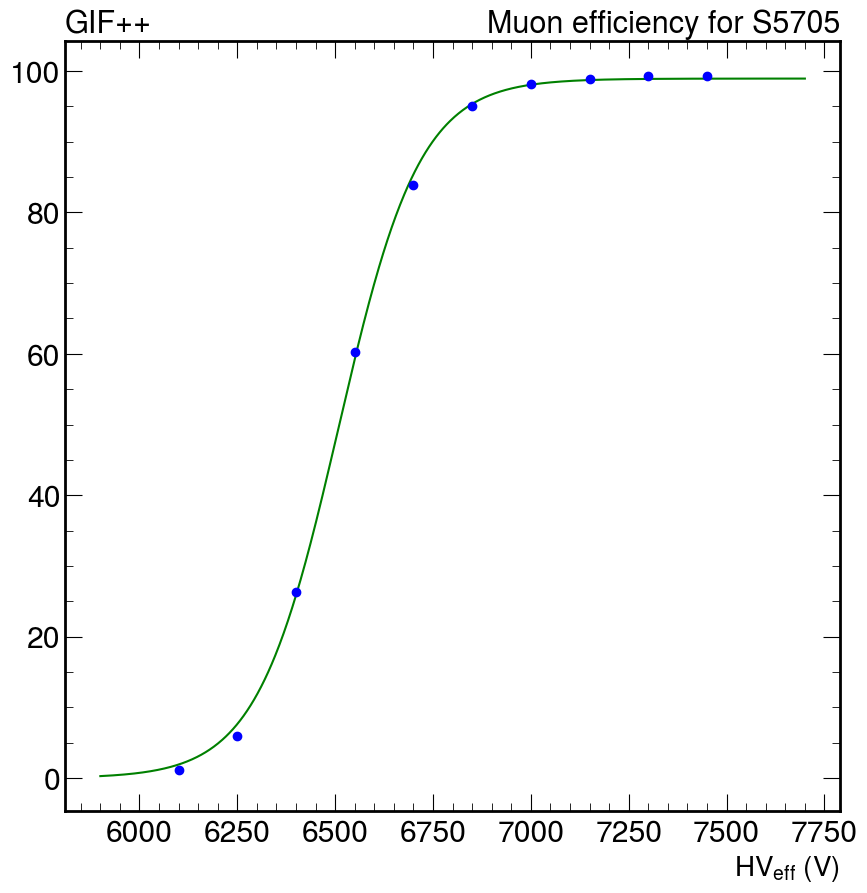

In [ ]:
p = []
WPs = []
EWPs = []

for i in range(len(labels)):

  flabel = labels[i]

  pi, WPi, EWPi =  Scurve_fitting(v[i], e[i], err[i], flabel)
  p.append(pi)
  WPs.append(WPi)
  EWPs.append(EWPi)

In [ ]:
def plot_all(voltages, efficiencies, e_err, param, WPs, EWps):

  x = np.linspace(5800, 7700, 1000)

  for k in range(len(voltages)):

    if k == 0:
      fcolor = 'green'
      filter = 'Source OFF.'
      fmt = '.'
    elif k == 1:
      fcolor = 'red'
      filter = 'ABS 3.3.'
      fmt = '.'
    elif k == 2:
      fcolor = 'blue'
      filter = 'ABS 4.6.'
      fmt = 'v'
    elif k == 3:
      fcolor = 'orange'
      filter = 'ABS 6.9.'
      fmt = '^'
    else:
      fcolor = 'purple'
      filter = 'ABS 10.'
      fmt = 'o'

    s = Scurve(x, param[k][0], param[k][1], param[k][2])
    plt.plot(x, s, color = fcolor)
    plt.errorbar(x = voltages[k], y = efficiencies[k], yerr=e_err[k], xerr=None, fmt = fmt, color = fcolor, label=str(filter)+' WP: '
              +str(round(WPs[k], 2))+' Efficiency at WP: '+str(round(EWPs[k], 2)))
    plt.legend(loc='upper left', fontsize=10)

  plt.title('CMS Muon Preliminary', loc = 'left', fontsize = 22)
  plt.title('GIF++ 40% $CO_2$ 0.5% $SF_6$', loc = 'right', fontsize = 22)
  plt.xlabel('$HV_{eff}$ (V)', fontsize = 20)
  plt.legend(loc = 'upper left')
  plt.scatter(WPs, EWPs, color = 'black', label='Working points')
  plt.legend(loc='upper left', fontsize =10)
  plt.ylabel('Efficiency (%)', fontsize = 20)
  plt.show()

plot_all(v, e, err, p, WPs, EWPs)

IndexError: ignored

In [ ]:
for l in range(len(WPs)):
  find_GB(labels[l], WPs[l])

The nearest HV point to the WP is:  7
Gamma background rate is:  0.8011507796899459
The nearest HV point to the WP is:  8
Gamma background rate is:  1268.384165776993
The nearest HV point to the WP is:  8
Gamma background rate is:  831.8163836315676
The nearest HV point to the WP is:  8
Gamma background rate is:  626.2646331936647
The nearest HV point to the WP is:  8
Gamma background rate is:  418.8522523490216


# Working point and Efficiency at the WP for all gas mixtures tested

The good one?

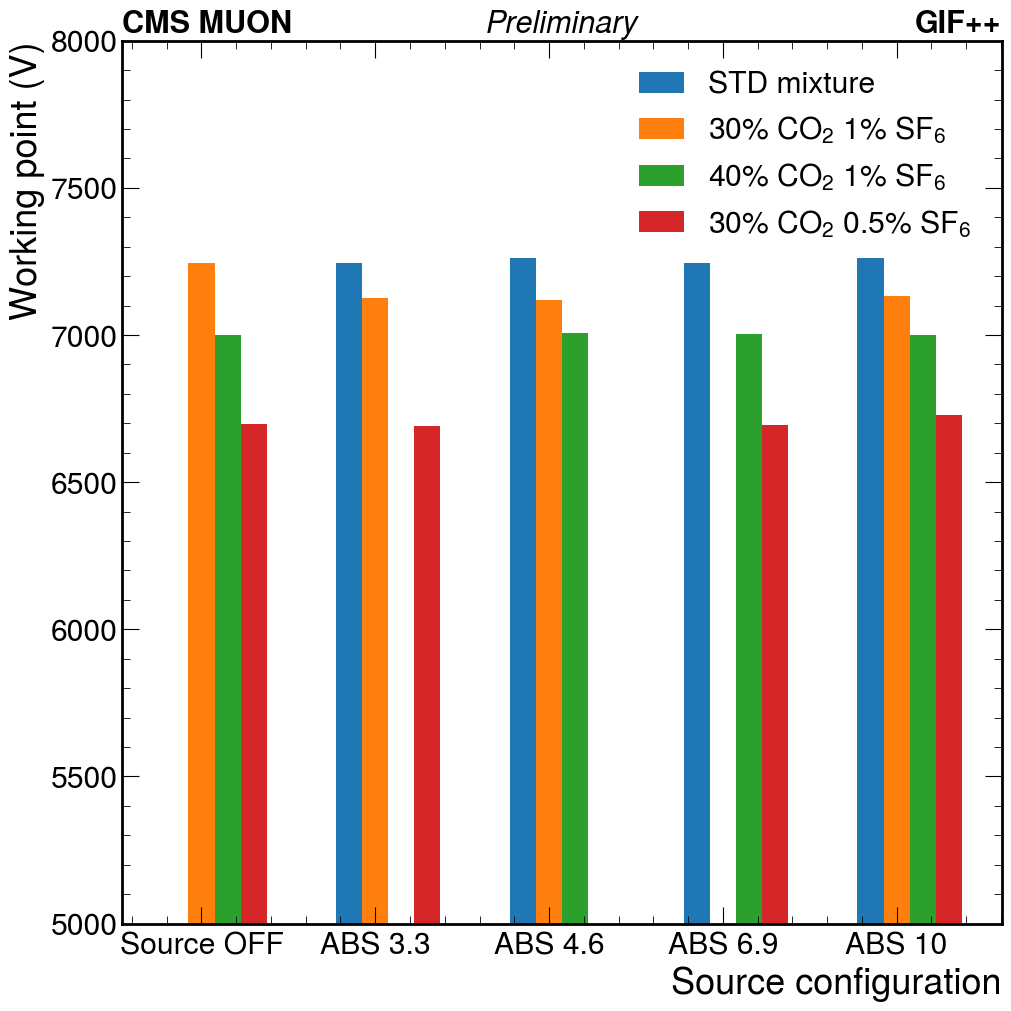

In [ ]:
species = ('Source OFF', 'ABS 3.3', 'ABS 4.6', 'ABS 6.9', 'ABS 10')
penguin_means = {
    'STD mixture': (0, 7246, 7260.14, 7243.20, 7261.31),
    '30% CO$_2$ + 1% SF$_6$': (7246, 7126.62, 7120.48, 0, 7131.27),
    '40% CO$_2$ + 1% SF$_6$': (6998.97, 0, 7007.31, 7002.51, 6999.88),
    '30% CO$_2$ + 0.5% SF$_6$':(6697.26, 6691.83, 0, 6694.90, 6727.30)
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    #ax.legend(loc='right')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Working point (V)')
ax.set_title('CMS MUON', loc='left', fontsize = 22, fontweight='bold')
ax.set_title('Preliminary', loc='center', fontsize=22, fontstyle = 'italic')
ax.set_title('GIF++', loc = 'right', fontsize = 22, fontweight='bold')
ax.set_xlabel('Source configuration')
ax.set_xticks(x + width, species)
ax.legend(loc='upper right')#, ncols=4)
ax.set_ylim(5000, 8000)
plt.savefig('WP_ev.pdf')
plt.savefig('WP_ev.png')

plt.show()

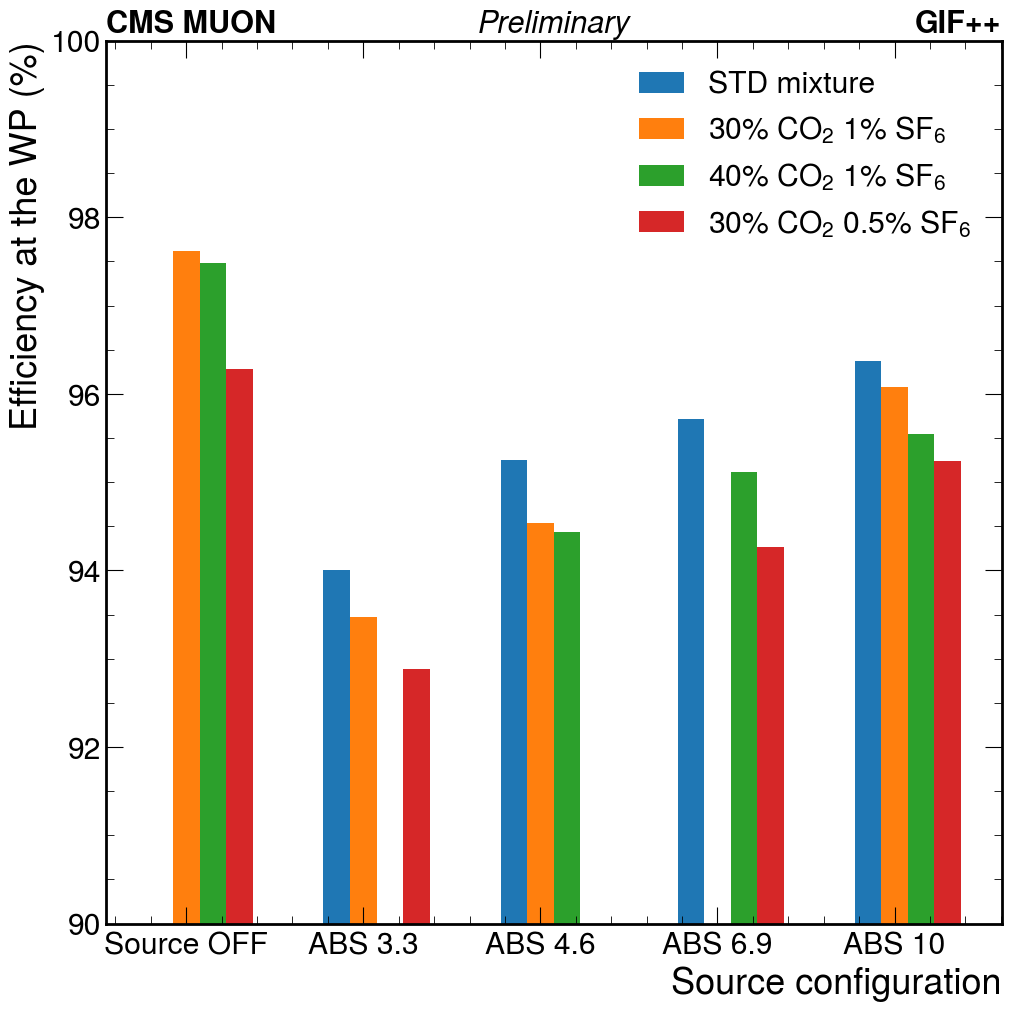

In [ ]:
species = ('Source OFF', 'ABS 3.3', 'ABS 4.6', 'ABS 6.9', 'ABS 10')
penguin_means = {
    'STD mixture': (0, 94, 95.25, 95.71, 96.37),
    '30% CO$_2$ + 1% SF$_6$': (97.62, 93.47, 94.54, 0, 96.08),
    '40% CO$_2$ + 1% SF$_6$': (97.48, 0, 94.43, 95.12, 95.54),
    '30% CO$_2$ + 0.5% SF$_6$':(96.28, 92.88, 0, 94.27, 95.24)
}

x = np.arange(len(species))  # the label locations
width = 0.15  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    #ax.legend(loc='right')
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Efficiency at the WP (%)')
ax.set_title('CMS MUON', loc='left', fontsize = 22, fontweight='bold')
ax.set_title('Preliminary', loc='center', fontsize=22, fontstyle = 'italic')
ax.set_title('GIF++', loc = 'right', fontsize = 22, fontweight='bold')
ax.set_xlabel('Source configuration')
ax.set_xticks(x + width, species)
ax.legend(loc='upper right')#, ncols=4)
ax.set_ylim(90, 100)
plt.savefig('Eff_ev.pdf')
plt.savefig('Eff_ev.png')
plt.show()